In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import pi

In [2]:
os.chdir("/Users/lingchm/Documents/Github/us_sodium_policies")

In [12]:
df = pd.read_excel("results/bar_chart_R1.xlsx", sheet_name="spyder")

In [13]:
df = df.sort_values(by=['Summary'], ascending=False)
# re-organize the columns to make sure they are displayed in this order
df = df[['organization','Activity', 'Priority', 'Originality', 'Popularity', 'Summary']]
df

,organization,Activity,Priority,Originality,Popularity,Summary
15,WHO,0.815857,0.004949,0.780488,0.746390,57272.0
0,AHA,0.608271,0.026152,0.777439,0.079950,27081.0
11,UN-FAO,0.375786,0.001805,0.965517,1.000000,16730.0
13,WASH,0.123376,0.594866,0.729697,0.000000,15772.0
9,Tom F.,0.088411,0.012817,0.968254,0.341292,12672.0
4,Harvard,0.804774,0.003837,0.780876,0.206084,12518.0
3,CSPI,0.475771,0.040865,0.800000,0.014023,9187.0
1,Alexey K.,0.072572,0.013020,0.821429,0.236108,6693.0
2,CDC,0.841427,0.003721,0.704724,0.099542,5790.0
12,USDA,0.772193,0.003514,0.638009,0.033958,1825.0


In [14]:
# domestic organizations are colored differently 
domestic = ["CDC", "USDA", "Harvard", "Stanford", "Kirsten B.D.",
           "Tom F.", "AHA", "CSPI"]

In [15]:
def make_spider(df, categories, summary=True, my_dpi=100, start_index=0):
    
    # initialize the figure
    fig = plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
    col = df.columns[0]

    # number of variable
    N = len(categories) 
    nrows = len(df.index)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    theta = np.linspace(0.0, 2*np.pi, N, endpoint=False)
    theta += 0.25 * np.pi 
    width = 2*np.pi/(N)
    
    for row in range(0, nrows):
        title= df[col][row]
        if title in domestic: color="firebrick"
        else: color="darkslategrey" #"midnightblue"
        title = "(" + str(row + 1 + start_index) + ") " + df[col][row] + "    "

        # Initialise the spider plot
        ax = plt.subplot(nrows//2, 2, row+1, projection='polar')
        finals=df.iloc[:,:-1].loc[row].drop(col).values.flatten().tolist()
        ax.bar(theta, finals, width=width, bottom=0.0, color=color, edgecolor="black", 
               linewidth=1.5, alpha=0.6, align='edge')
        
        ax.set_xticks(ticks=theta, labels=["", " ", "", " "],color="grey", size=10) 
        #ax.set_xticklabels(color="grey", size=10)
        plt.text(np.pi*1.5, 1.1, "Originality            ", color='grey', size=12, ha='center', va='center')
        plt.text(0,   1.1, "Popularity", color='grey', size=12, ha='center', va='center')
        plt.text(np.pi*0.5, 1.1, "         Activity", color='grey', size=12, ha='center', va='center')
        plt.text(np.pi,  1.1, "Priority", color='grey', size=12, ha='center', va='center')
        
        text = df.loc[row]["Summary"]
        plt.text(0,0, f"{text:,.0f}", color='black', size=15, ha='center', va='center')

        ax.set_ylim(0,1)
        #ax.set_yticks([0.2,0.4,0.6,0.8])
        ax.set_yticklabels([], color="grey", size=9)
        
        ax.set_theta_zero_location('N')
        ax.set_theta_offset(pi/2)
        ax.set_theta_direction(-1)
        ax.spines['polar'].set_color("grey")
        ax.spines['polar'].set_alpha(1)
        #ax.set_axisbelow(True)
        plt.title(title, size=22, color=color, y=1.1)
        
    fig.tight_layout(pad=3.0)
    
    return 

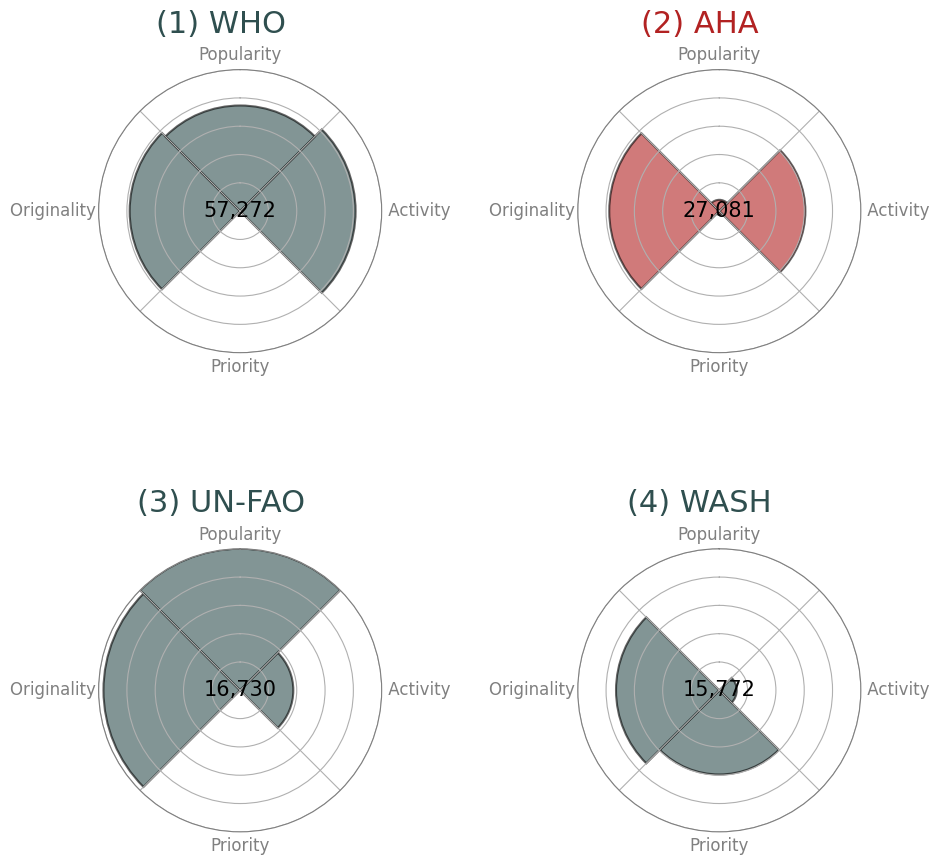

In [16]:
# plot four by four 
for i in range(1):
    start, end = i * 4, (i+1) * 4
    make_spider(df.iloc[start:end].reset_index(drop=True), categories=list(df)[1:-1], start_index=start)